# Decisiones de Ahorro.

Supongamos que Ricardo ha ganado el premio mayor de la Lotería Nacional y decide meter su dinero al banco que le ofrece una tasa de interés anual $i$. Al inicio del año $k$ decide retirar $a_k$ pesos para sus gastos y planea repetir este proceso $N$ veces, es decir, $k = 0,1,\ldots,N-1$. Si $x_k$ denota la cantidad de dinero al inicio del año $k$, entonces la siguiente ecuación

$$
x_{k+1} = (1+i)(x_k-a_k), k = 0,1,\ldots,N_1,
$$

describe cómo va cambiando la fortuna de Ricardo en función de los
retiros que haga. Utility theory, una empresa de consultoría, le recomienda a Ricardo que escoja $a_0,\ldots,a_{N-1}$ de tal forma que maximice
$$
f(x_N,a_0,\ldots,a_{N-1}) = \beta^N(x_N)^{1-\gamma} + \sum_{k=0}^{N-1}\beta^{k}(a_k)^{1-\gamma}.
$$

La cantidad final $x_N$ será heredada a sus descencdiantes. Los parámetros $\beta,\gamma\in(0,1)$ fueron estimados por Utility theory.


## Implementación del APD

### Librerias



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


### Parámetros
Comenzaremos con la definición de las condiciones iniciales.

In [7]:
r = 0.06  # Tasa de Interés
beta = 0.9  # Paráemtros dados por Utility Theore
gamma = 0.5

### Condiciones Iniciales

In [8]:
N = 20  # Número de Etapas
X = np.linspace(0.001, 2, 100)  # Espacio de Estados (Expresando en millones de pesos)
valFUNCTs = np.zeros((N, len(X)))  # Funciones de Valor.
OPTpolicy = np.zeros((N-1,len(X)))  # Políticas Optimas.


valFUNCTs[-1] = beta ** N * X ** (1-gamma)

# Implementación

(19, 100)


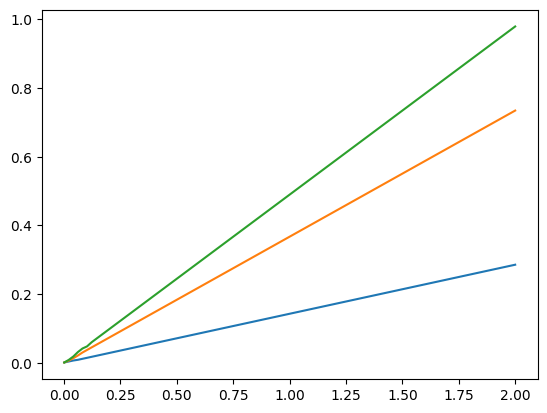

In [9]:
for k in range(N - 1):
    for x in range(len(X)):
        A = np.linspace(0.00001, X[x])

        cs = CubicSpline(X, valFUNCTs[N-k-1])
        vcs = np.array([cs(t) for t in (1+r)*(X[x] - A)])
        valFUNCTs[N - k - 2,x]  = np.max((beta** (N-k)) * (A ** (1-gamma)) + vcs)
        a = list((beta** (N-k)) * (A ** (1-gamma)) + vcs).index(valFUNCTs[N-k - 2,x])
        OPTpolicy[N - k - 2, x] = A[a]


print(OPTpolicy.shape)
plt.plot(X, OPTpolicy[0])
plt.plot(X, OPTpolicy[N-3])
plt.plot(X, OPTpolicy[N-2])
plt.show()

## Simulación de Ruta Óptima

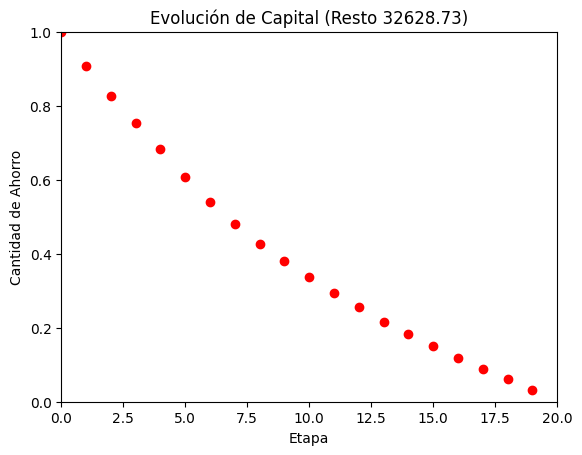

In [14]:
x0 = 1

testA = list()
Xopt = np.zeros(N)
Xopt[0] = x0
Aopt = np.zeros(N-1)

for k in range(N-1):
    cs = CubicSpline(X,OPTpolicy[k])
    Aopt[k] = cs(Xopt[k]) - 0.001
    testA.append(Aopt[k])
    Xopt[k + 1] = (1+r)*(Xopt[k]- Aopt[k]);

# Maximo sobrante: 29952.04
plt.plot(Xopt, 'ro')
plt.xlim([0,20])
plt.ylim([0,1])
plt.title(f'Evolución de Capital (Resto {round(Xopt[-1] * 1_000_000, 2)})')
plt.xlabel('Etapa')
plt.ylabel('Cantidad de Ahorro')
plt.show()

In [11]:
def maxf(A, X, r, beta, gamma):
    A = np.array(A)
    xN = X[-1]
    f = beta ** N * (xN ** (1 - gamma)) + np.sum(beta ** np.arange(N - 1) * (A ** (1 - gamma)))
    return f

# Maximo 2.592413247568012
# Propuesta1 (-0.01) 2.583180529214154
# Propuesta2 (- 0.001) 2.592050378719
maxf(testA,Xopt, r, beta,gamma)



2.592413247568012

### Ejercicio
Crear una función en Python para el problema de Decisiones de Ahorro.
* ¿Cuáles serían los argumentos de entrada?
* ¿Cuál sería la salida?


### Importancia de $h_k(x)$

Ya sabemos que existe la función $h_k(x)$ tal que es óptima para el problema.  

ak 9.434026158189761
ak 9.266979328118351
ak 9.083434779872396
ak 8.881763181695955
ak 8.660174287339146
ak 8.416701043975872
ak 8.149182130602991
ak 7.855242771913682
ak 7.532273657329046
ak 7.17740777805142
ak 6.787494976521037
ak 6.35907398235064
ak 5.8883416865000076
ak 5.371119380936065
ak 4.802815664086846
ak 4.178385682799605
ak 3.4922863489924416
ak 2.7384271334559998
ak 1.910116
2.564906083711609
[0.10599928209144208, 0.102259941177131, 0.09865251314182776, 0.09517234448962299, 0.09181494588616881, 0.08857598636754462, 0.08545128775341729, 0.08243681925728848, 0.07952869228687633, 0.0767231554279245, 0.07401658960496739, 0.0714055034128094, 0.06888652861269559, 0.06645641578736437, 0.06411203014937691, 0.06185034749731615, 0.059668450314639424, 0.05756352400615189, 0.05553285326724591]


(0.0, 1.0)

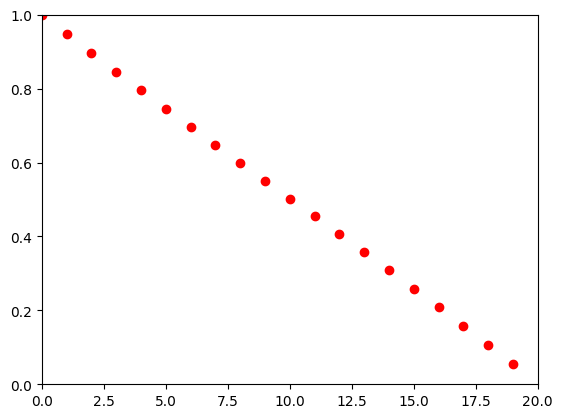

In [12]:
def Ak(beta, gamma, r, k, N):
    ak = 0
    if k<0 or k> N-1:
        ak = -999
    else:
        if k == N-1:
            return 1
        exp1 = (1 + r ) * beta * Ak(beta, gamma, r, k + 1, N)
        exp2 = exp1 ** (1 / gamma) + 1
        ak = exp2 ** gamma
    return ak


def hk(beta, gamma, i, x, k, N):
    ak = (Ak(beta, gamma, i, k, N)) ** (1 / gamma)
    h = x / ak
    print("ak", ak)
    return h



N = 20  # Número de Etapas

r = 0.06  # Tasa de Interés
beta = 0.9  # Paráemtros dados por Utility Theore
gamma = 0.5
x0 = 1
c_N = beta ** N * x0 ** (1-gamma)
Xopt = np.zeros(N)
Xopt[0] = x0


hopt = []
for k in range(N - 1):
    a = hk(beta, gamma, r, Xopt[k], k, N)
    Xopt[k + 1] = (1 + r) * (Xopt[k] - a)
    hopt.append(a)

print(maxf(hopt,Xopt, r, beta,gamma))
print(hopt)
plt.plot(Xopt, 'ro')
plt.xlim([0,20])
plt.ylim([0,1])

(19, 100)


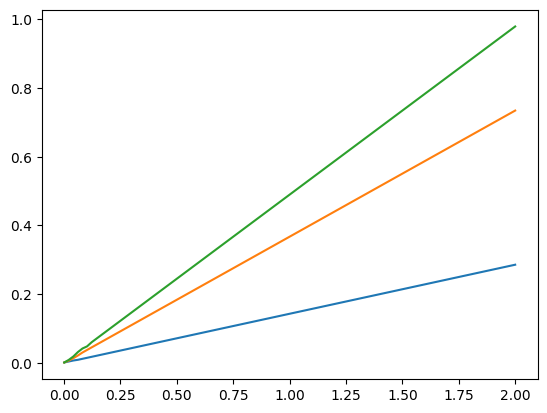

In [13]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline

import matplotlib.pyplot as plt

r = 0.06
beta = 0.9
gamma = 0.5

X = np.linspace(0.001,2,100)
N = 20
valFUNCTs = np.zeros((N, len(X)))

valFUNCTs[-1] = beta ** N * X ** (1-gamma)

OPTpolicy = np.zeros((N-1, len(X)))

for k in range(N - 1):
    for x in range(len(X)):
        A = np.linspace(0.00001, X[x])
        cs = CubicSpline(X, valFUNCTs[N-k-1])
        vcs = np.array([cs(t) for t in (1+r)*(X[x] - A)])
        valFUNCTs[N - k - 2,x]  = np.max((beta** (N-k)) * (A ** (1-gamma)) + vcs)
        a = list((beta** (N-k)) * (A ** (1-gamma)) + vcs).index(valFUNCTs[N-k - 2,x])
        OPTpolicy[N- k - 2, x] = A[a]


df = pd.DataFrame(OPTpolicy)
df.to_excel('Prueba.xlsx')


print(OPTpolicy.shape)
plt.plot(X, OPTpolicy[0])
plt.plot(X, OPTpolicy[N-3])
plt.plot(X, OPTpolicy[N-2])
plt.show()

### Ruta Optima
